In [26]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio

# Percent Open Area (POA) Function:

Using the .shape atrribute the pixel rows "X" and pixel columns "Y" are determined

The 3D RGB array is converted into 2D grayscale matrix according to the equation:

$\begin{align*}
    grayscale\, Intensity &= \frac{(R * 0.3) + (G * 0.59) + (B * 0.11)}{3}\\ 
\end{align*}$

The function argument sets the intensity value (0 to 255) at which values greater than are converted to pure white 
and values lower than are converted to pure black
```                
percent_open(file, intensity)
```
A is set as the number of white pixels. Because values are either black; ```[0, 0, 0]``` or white; ```[255, 255, 255]```,
the number of black versus white pixels can be determined from any layer R = G = B ie. ```photo_data[:, :, 0]```, ```photo_data[:, :, 1]```, or ```photo_data[:, :, 2]```

In [50]:
def percent_open(file, intensity):
    photo_data = imageio.imread(file)
    
    X, Y, Z = photo_data.shape
    
    avg_value = ((photo_data[:, :, 0] * 0.3) + (photo_data[:, :, 1] * 0.59) + (photo_data[:, :, 2] * 0.11)) / 3

    photo_data[avg_value <= intensity] = 0
    photo_data[avg_value > intensity] = 255

    A, _ = (photo_data[photo_data[:, :, 0] == 255].shape)

    print('Total pixel count: ' + str(X * Y))
    print('Open area pixel count: ' + str(A))
    print('Percent Open Area (POA): ' + str(round(((A) / (X * Y)) * 100, 2)) + '%')

    plt.figure(figsize = (15,15))
    plt.imshow(photo_data)

Total pixel count: 3695914
Open area pixel count: 264497
Percent Open Area (POA): 7.16%


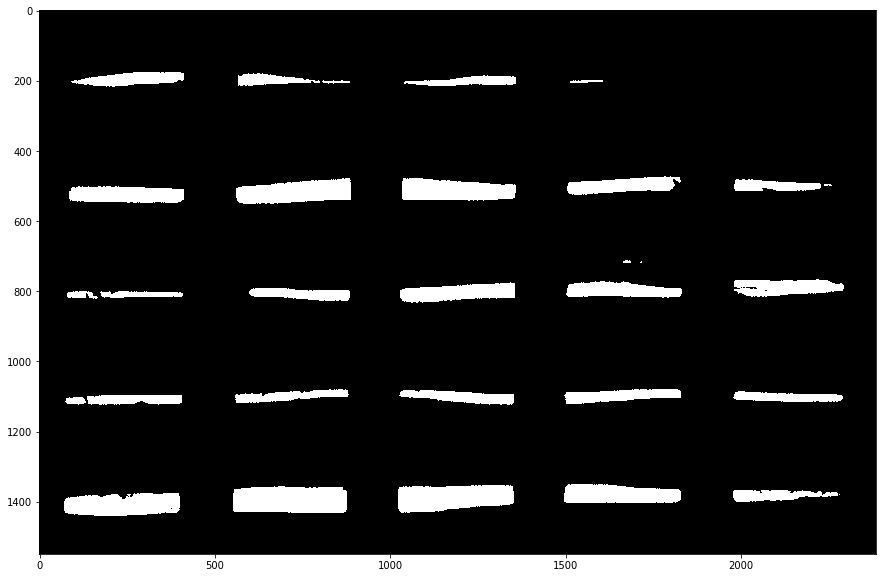

In [51]:
percent_open('./20141023_POA_Specimen_2.jpg', 30)